# T-Test
t-test idea is to compare the difference between two groups means and to see if they are significant or not.

Null Hypothesis: The difference between two groups means is equal to zero.

Alternative Hypothesis: The difference between two groups means is not equal to zero.

t-test formual is as follows:
$ t_k = \frac{\bar{x} - \bar{y}}{\frac{s}{\sqrt{n}}} $

where $ \bar{x} $ and $ \bar{y} $ are the means of two groups, $ s $ is the standard deviation of the two groups and $ n $ is the number of samples in each group.

Think about it as $\frac{Difference of means}{Standard deviations}$

## One sample t-test

One sample t-test is used to compare the mean of a sample to a known mean of a population.

**Example**: We have a sample of 100 students and we want to know if the mean of their heights is equal to the mean of the population of heights of all students in the world.

**Example**:
Test whether the IQ of a sample of students is significantly different from the general population IQ of 100.

Formal statement: Estimate the probability that a certain group of students has a mean IQ of 100.

$ t_{n-1} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}} $

where $ \bar{x} $ is the mean of the sample, $ \mu $ is the mean of the population, $ s $ is the standard deviation of the sample and $ n $ is the number of samples in the sample.

Assumptions:
1. The sample is a random sample from the population.
2. Data are numeric (not categorical).
3. Data are independent from each other.
4. Mean and standard deviation are valid descriptors of central tendendecy and dispersion.
5. Data are normally distributed.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


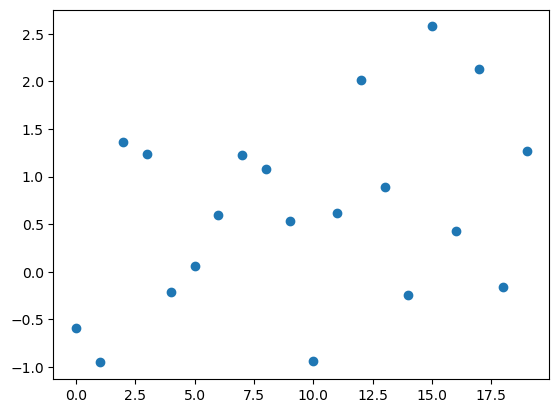

In [3]:
# generate the data

N = 20
popMu = .5
data = np.random.randn(N) + popMu

# plot the data
plt.plot(data, 'o')
plt.show()

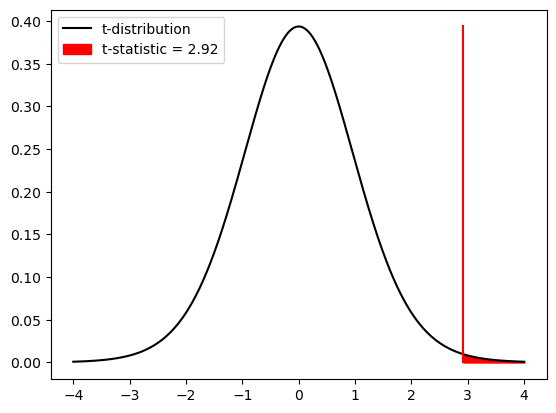

In [7]:
# null hypothesis: the mean is 0
H0val = 0

# compute the t-statistic
tVal = (data.mean() - H0val) / (data.std(ddof=1) / np.sqrt(N))

df = N - 1

# compute the p-value
# one-sided test
pVal = (1 - stats.t.cdf(np.abs(tVal), df))

x = np.linspace(-4, 4, 1001)
tdist = stats.t.pdf(x, df)

plt.plot(x, tdist, 'k')
plt.fill_between(x, tdist, where=(x >= np.abs(tVal)), color='r')
plt.plot([tVal, tVal], [0, max(tdist)], 'r')
plt.legend(['t-distribution', 't-statistic = %.2f' % tVal])
plt.show()

In [9]:
t, p = stats.ttest_1samp(data, H0val) # two tailed test

print('t-statistic = %.2f' % t)
print('p-value = %.2f' % p)

t-statistic = 2.92
p-value = 0.01


# Two sample t-test
Tests whether the means of two independent samples are significantly different. 

**Paired** t-test is used when the samples are dependent (e.g., if they are the same students before and after an experiment).

**Unpaired** t-test is used when the samples are independent (e.g., if they are two different groups of students).

**Equal or Unequal Variance** t-test is used when the samples have equal variance.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

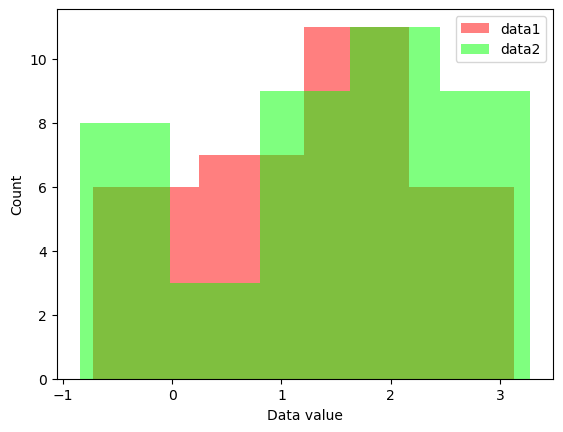

In [14]:
# generate data
n1 = 30
n2 = 40
mu1 = 1
mu2 = 1.2

data1 = np.random.randn(n1) + mu1
data2 = np.random.randn(n2) + mu2

# plot the data
plt.hist(data1, bins='fd', color=[1,0,0,.5], label='data1')
plt.hist(data2, bins='fd', color=[0,1,0,.5], label='data2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
t,p = stats.ttest_ind(data1, data2)
print('t-statistic = %.2f' % t)
print('p-value = %.2f' % p)

t-statistic = -0.84
p-value = 0.40


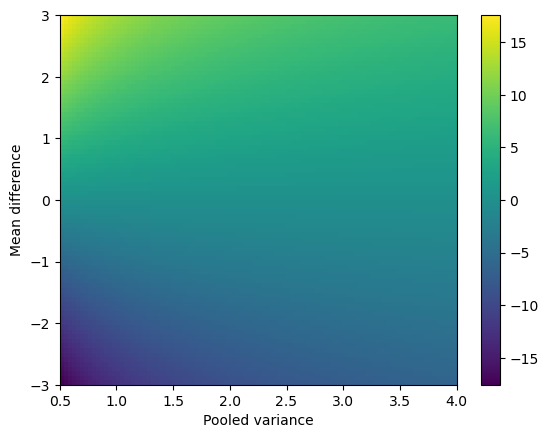

In [18]:
# a 2D space of t values

# compute the t-statistic
meandiff  = np.linspace(-3 , 3, 80)
pooledvar = np.linspace(.5 , 4, 100)

n1 = 40
n2 = 30

allTVals = np.zeros((len(meandiff), len(pooledvar)))

for i in range(len(meandiff)):
    for j in range(len(pooledvar)):
        df = n1 + n2 - 2
        s = np.sqrt(((n1-1)*pooledvar[j] + (n2-1)*pooledvar[j]) /df)
        t_den = s * np.sqrt(1/n1 + 1/n2)

        allTVals[i,j] = meandiff[i] / t_den


plt.imshow(allTVals, origin='lower', extent=[pooledvar[0], pooledvar[-1], meandiff[0], meandiff[-1]], aspect='auto')
plt.xlabel('Pooled variance')
plt.ylabel('Mean difference')
plt.colorbar()
plt.show()